<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220616.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes
import os
from datetime import datetime, date, time, timezone, timedelta

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd


# Regressor

In [57]:
raw = skd.make_classification(n_samples = 2000, n_features = 15, n_classes = 2)
x = pd.DataFrame(raw[0], columns = [f'p{a}' for a in range(1, 16)])
y = raw[1]
x.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15
0,-0.851623,0.788130,0.956716,1.177465,-0.077830,-1.186948,0.821401,1.003186,-0.449798,-1.500566,1.042985,-0.638618,-2.074737,-0.078251,0.127081
1,-0.311394,-1.043776,-1.185585,0.653420,-0.376303,0.797266,-1.121148,1.449900,1.778657,0.409227,-0.924080,0.506654,-0.082221,0.104178,-0.471624
2,0.462581,-1.142694,-0.694698,0.224524,0.230670,-1.637473,0.181450,-1.668071,-1.770707,-0.178279,0.573896,0.691571,0.457774,0.247655,1.870709
3,-0.282544,0.901010,0.364090,-0.342710,-0.322059,0.455130,-0.082714,1.527256,1.993647,0.558532,0.318840,0.798115,0.120683,1.435749,1.685789
4,0.122534,-2.669551,-0.507386,1.874798,1.456560,0.324978,0.341059,-0.812832,-1.134595,-0.375322,-0.242436,0.104855,-0.912184,-0.511139,-1.789504


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


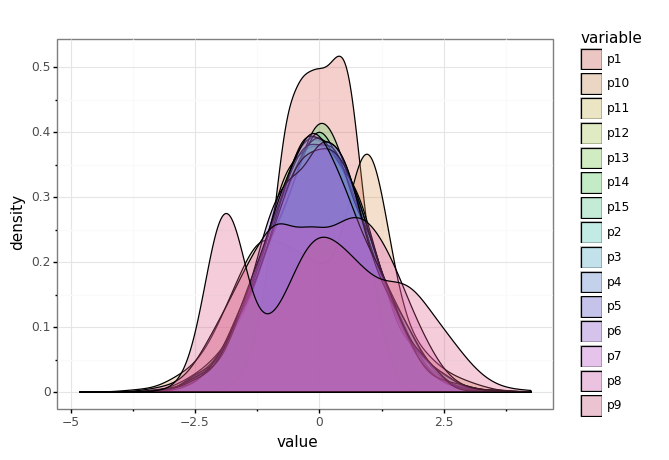

<ggplot: (8760671138941)>

In [58]:
(
    ggplot(pd.melt(x.assign(a = 1), id_vars = 'a'),
           aes('value', fill = 'variable')
           ) +
    gg.geom_density(alpha = .3) +
    gg.theme_bw()
)

In [59]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [60]:
fit_leg = LogisticRegression().fit(x_tr, y_tr)
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)

In [61]:
pred_leg = fit_leg.predict(x_te)
pred_rf = fit_rf.predict(x_te)

proba_rf = fit_rf.predict_proba(x_te)[:,-1]

In [62]:
accuracy_score(y_te, pred_leg), accuracy_score(y_te, pred_rf)

(0.9283333333333333, 0.9383333333333334)

In [63]:
roc_auc_score(y_te, pred_leg), roc_auc_score(y_te, pred_rf)

(0.9293197210823075, 0.9385280085410203)

In [64]:
fpr, tpr, thre = roc_curve(y_te, proba_rf)

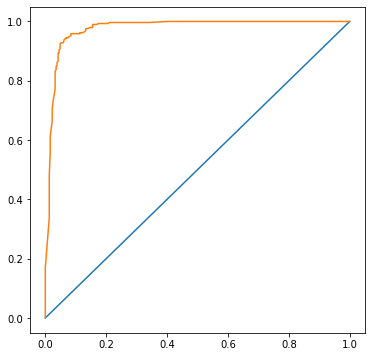

In [65]:
plt.figure(figsize = [6,6])
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)

# Customer Analysis

In [66]:
os.listdir()

['.config',
 'retail_data_transactions.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'retail_data_response.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'rfm_test.csv',
 '.Rhistory',
 'sample_data']

In [67]:
df = pd.read_excel('online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [68]:
df.columns = [a.replace(' ', '-').lower() for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer-id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [84]:
df_ = df.dropna()

In [85]:
df_ = df_[(df_['country'] == 'United Kingdom') & (~df_['invoice'].astype(str).str.contains('C'))]
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer-id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [86]:
df.shape, df_.shape

((525461, 8), (370951, 8))

In [87]:
df_['date'] = df_['invoicedate'].to_numpy().astype('datetime64[D]')
df_['month'] = df_['invoicedate'].to_numpy().astype('datetime64[M]')
df_['rev'] = df_['quantity'] * df_['price']
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer-id,country,date,month,rev
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,30.0


In [88]:
df_ = df_[['customer-id', 'date', 'month', 'rev']].rename(columns = {'customer-id':'id'})
df_ = df_.sort_values(['id', 'date'])
df_.head()

,id,date,month,rev
27994,12346.0,2009-12-14,2009-12-01,45.0
28251,12346.0,2009-12-14,2009-12-01,22.5
28254,12346.0,2009-12-14,2009-12-01,22.5
39398,12346.0,2009-12-18,2009-12-01,22.5
39411,12346.0,2009-12-18,2009-12-01,1.0


In [90]:
df_ = df_.groupby(['id','date', 'month'])['rev'].sum().reset_index()
df_.head()

,id,date,month,rev
0,12346.0,2009-12-14,2009-12-01,90.0
1,12346.0,2009-12-18,2009-12-01,23.5
2,12346.0,2010-01-04,2010-01-01,45.0
3,12346.0,2010-01-14,2010-01-01,22.5
4,12346.0,2010-01-22,2010-01-01,22.5


In [95]:
list_pu = df_.groupby(['id', 'month']).first().reset_index()
list_npu = df_.groupby(['id']).first().reset_index()
list_mon = list_npu['month'].sort_values().unique()

In [117]:
for mon in list_mon : 
  
  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['rev'].count().reset_index().rename(columns = {'rev':'pu'})
  temp = temp.assign(npu_month = mon,
              num = temp['month'].rank(method = 'first'),
              ratio = [a/temp['pu'].max() for a in temp['pu']]
              ).reindex(columns = ['npu_month', 'num', 'pu', 'ratio'])
  
  if mon == list_mon[0] :

    res = temp

  else :

    res = pd.concat([res, temp], axis = 0)

res.head()

,npu_month,num,pu,ratio
0,2009-12-01,1.0,904,1.000000
1,2009-12-01,2.0,318,0.351770
2,2009-12-01,3.0,298,0.329646
3,2009-12-01,4.0,382,0.422566
4,2009-12-01,5.0,342,0.378319


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


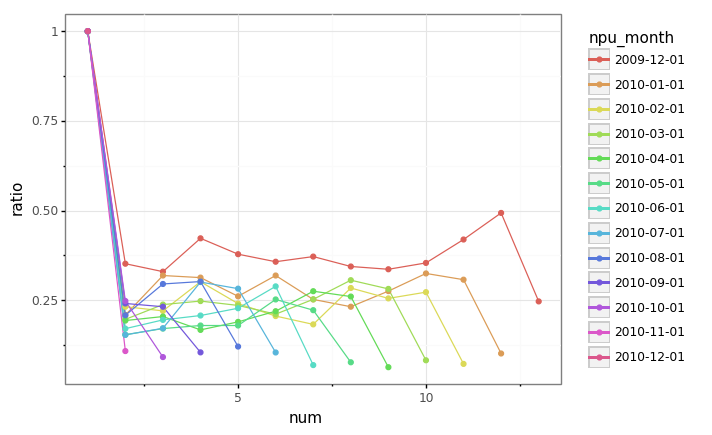

<ggplot: (8760671121321)>

In [118]:
(
    ggplot(res.assign(npu_month = res['npu_month'].astype(str)),
           aes('num', 'ratio', color = 'npu_month')
           ) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

In [143]:
info_f = df_.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1,0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,12346.0,0.0
1,12608.0,1.0
2,12745.0,0.0
3,12746.0,0.0
4,12747.0,4.0


In [144]:
info_m = df_.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,12346.0,0.00
1,12608.0,415.79
2,12745.0,0.00
3,12746.0,0.00
4,12747.0,1801.06


In [147]:
df_ = df_.sort_values(['id', 'date'], ascending = [1, 0])
now_time = datetime(2010,12,31)

In [162]:
info_r = df_.groupby(['id'])['date'].apply(lambda x : (now_time - x).dt.days).reset_index()
info_r = info_r.rename(columns = {'index' : 'id','date' : 'recency'})
info_r.head()

,id,recency
0,6,186
1,5,304
2,4,343
3,3,351
4,2,361


In [178]:
info = pd.merge(info_r, info_f, 'left', 'id')
info = pd.merge(info, info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,6,186,NaN,NaN
1,5,304,NaN,NaN
2,4,343,NaN,NaN
3,3,351,NaN,NaN
4,2,361,NaN,NaN


In [179]:
info = info.dropna().reset_index().drop('index', axis = 1)
info = info[info['money'] > 0]
info.head()

,id,recency,freq,money
1,12608,166,1.0,415.79
2,12748,52,33.0,9135.24
3,12747,81,4.0,1801.06
6,12749,109,2.0,1973.58
9,12820,129,2.0,456.55


In [183]:
info = info.assign(m = pd.qcut(info['money'], 5, list('54321')),
            r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321'))
            )

In [186]:
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,recency,freq,money,m,r,f,rf
1,12608,166,1.0,415.79,3,3,5,35
2,12748,52,33.0,9135.24,1,1,1,11
3,12747,81,4.0,1801.06,1,2,1,21
6,12749,109,2.0,1973.58,1,2,2,22
9,12820,129,2.0,456.55,3,2,2,22


In [184]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [188]:
info = info.assign(rf = info['rf'].replace(seg_map, regex = True))
info.head()

,id,recency,freq,money,m,r,f,rf
1,12608,166,1.0,415.79,3,3,5,loyal_customers
2,12748,52,33.0,9135.24,1,1,1,hibernating
3,12747,81,4.0,1801.06,1,2,1,hibernating
6,12749,109,2.0,1973.58,1,2,2,hibernating
9,12820,129,2.0,456.55,3,2,2,hibernating


In [191]:
cnt = info.groupby(['m', 'rf'])['freq'].count().reset_index()
cnt.head()

,m,rf,freq
0,5,about_to_sleep,3
1,5,at_Risk,60
2,5,cant_loose,40
3,5,champions,27
4,5,hibernating,3


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


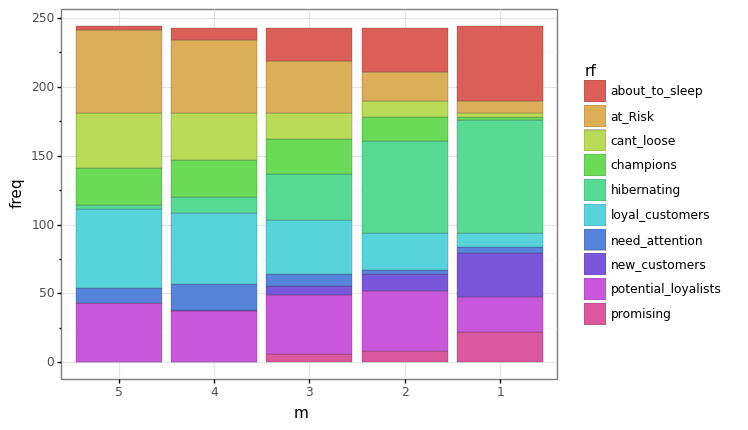

<ggplot: (8760667920005)>

In [192]:
(
    ggplot(cnt, aes('m', 'freq', fill = 'rf')) +
    gg.geom_col(color = '#333333', size = 0.1) +
    gg.theme_bw()
)